# Assignment 1 & 2 - An End to End ML Project + Causal Inference


#### Mohamed Elenany - 260892581
The aim of this project is to predict the per-hour demand for bikes among users utilizing a bike-sharing system similar to Bixi but in Seoul.

In [ ]:
#importing required libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bike_df = pd.read_csv('SeoulBikeData.csv', encoding='utf-8')

### Visualize Data Structure

In [ ]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
print(bike_df['Seasons'].value_counts())
print(bike_df['Holiday'].value_counts())
print(bike_df['Functioning Day'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


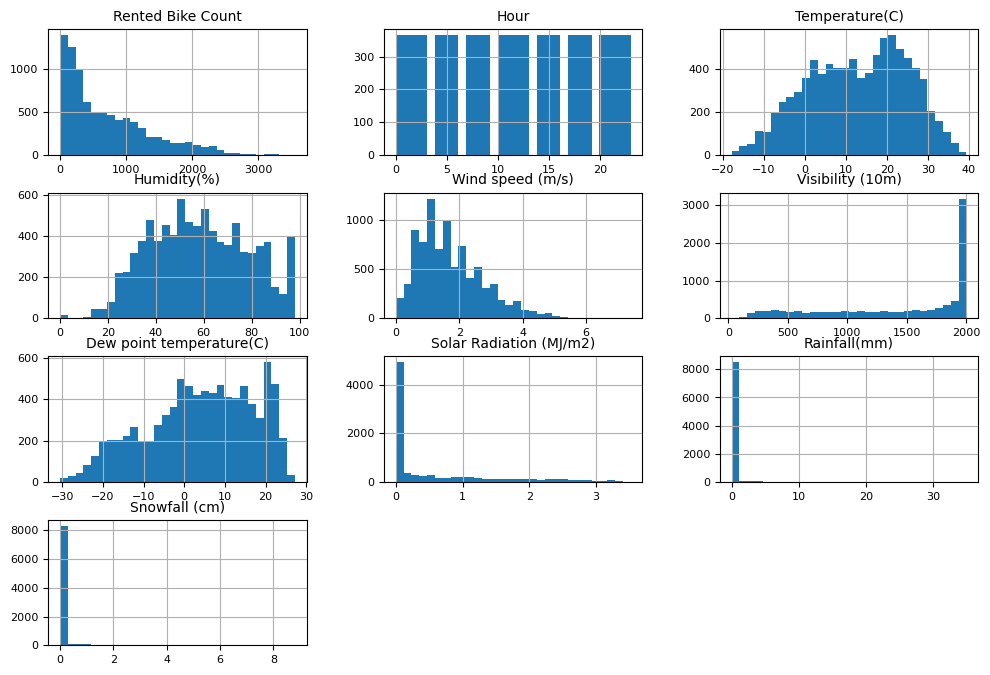

In [ ]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

bike_df.hist(bins=30, figsize=(12, 8))
plt.show()

Temperature, Humidity, and Wind Speed appear to follow a slightly normal distribution. Solar Radiation, Snowfall, and Visibility, on the other hand, predominantly concentrate their values within a single bin, with other value ranges being infrequent. The data appears to be equally distributed (or fully representative) across all hours of the day, as each hour bin exhibits an equal amount of data. The target variable, Rented Bike Count, displays a right-skewed distribution.

### Discover and Visualize Data for Insights

##### Looking for Correlations

In [ ]:
corr_matrix = bike_df.corr(numeric_only=True)
print(corr_matrix['Rented Bike Count'].sort_values(ascending=False))

Rented Bike Count           1.000000
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Wind speed (m/s)            0.121108
Rainfall(mm)               -0.123074
Snowfall (cm)              -0.141804
Humidity(%)                -0.199780
Name: Rented Bike Count, dtype: float64


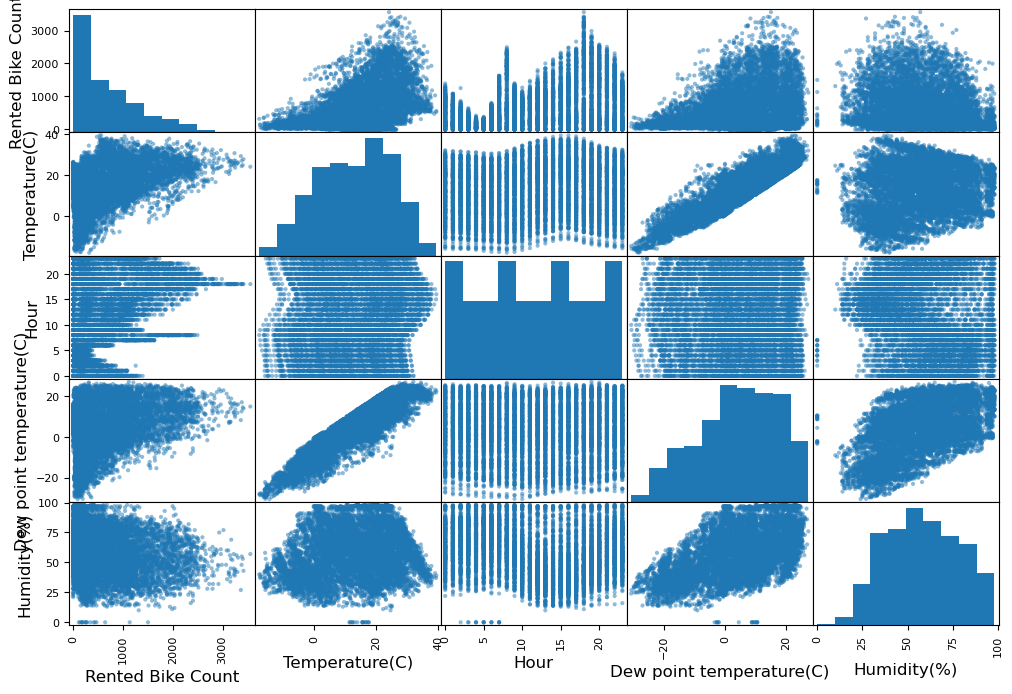

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Rented Bike Count',"Temperature(C)", "Hour", "Dew point temperature(C)",'Humidity(%)']
scatter_matrix(bike_df[attributes], figsize=(12, 8))
plt.show()

The variables Temperature, Dew Point Temperature, and Hour exhibit the strongest positive correlation with the number of bikes rented per hour, whereas Humidity, Snowfall, and Rainfall demonstrate the strongest negative correlation. This pattern is reasonable because excessive humidity, snow, or rainfall can make bike riding unsafe, leading to decreased demand. Conversely, as temperatures rise and conditions improve, there is typically a higher reliance on bikes—essentially, the demand peaks during summer weather. Furthermore, the demand for bikes increases throughout the day, with lower demand from 1 am to around 5 am, as people are usually asleep during this period. Demand gradually rises thereafter as people begin to wake up, peaking around 5-6 pm during rush hour.

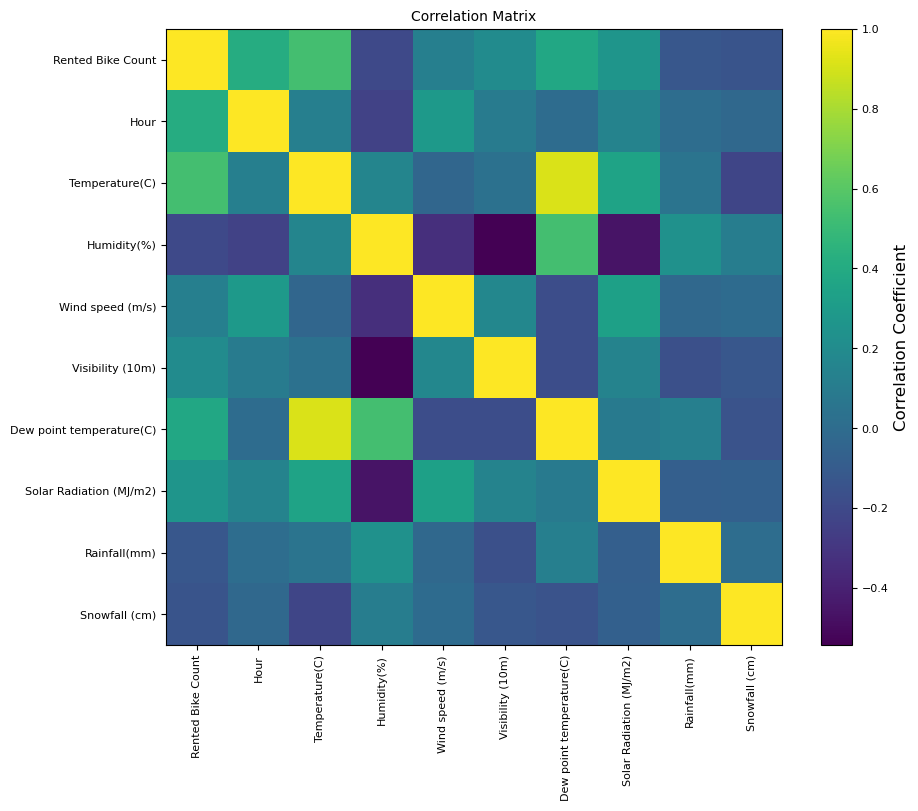

In [ ]:
# Using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

Some collinearity between variables is being detected, and should be addressed in the next steps to avoid multicollinearity in the model. For example, Temperature and Dew Point Temperature are highly correlated with each other, thus one should be eliminated.

##### Experimenting with Attribute Combinations

In [ ]:
import math

def calculate_heat_index(temperature, humidity):
    # convert temperature to Fahrenheit
    temperature = (temperature * 9/5) + 32
    # Calculate the heat index
    heat_index = (
        -42.379 +
        2.04901523 * temperature +
        10.14333127 * humidity -
        0.22475541 * temperature * humidity -
        6.83783e-03 * temperature**2 -
        5.481717e-02 * humidity**2 +
        1.22874e-03 * temperature**2 * humidity +
        8.5282e-04 * temperature * humidity**2 -
        1.99e-06 * temperature**2 * humidity**2
    )
    heat_index = max(heat_index, temperature)
    return round((heat_index - 32) * 5/9, 2)  # Convert back to Celsius

def calculate_wind_chill(temperature, wind_speed):
    # Convert temperature to Fahrenheit
    temperature_f = (temperature * 9/5) + 32
    # Convert wind speed to miles per hour
    wind_speed_mph = wind_speed * 2.23694  # 1 m/s = 2.23694 mph
    # Calculate the wind chill index
    wind_chill_index = 35.74 + 0.6215 * temperature_f - 35.75 * (wind_speed_mph ** 0.16) + 0.4275 * temperature_f * (wind_speed_mph ** 0.16)
    # Convert back to Celsius
    wind_chill_celsius = (wind_chill_index - 32) * 5/9
    return round(wind_chill_celsius, 2)

comb_df = bike_df.copy()
comb_df['weekday_is_vacation'] = comb_df.apply(lambda row: 1 if (row['Holiday'] == 'Holiday' and row['Functioning Day'] == 'Yes') else 0, axis=1)
comb_df['Heat_Index_C'] = comb_df.apply(lambda row: calculate_heat_index(row['Temperature(C)'], row['Humidity(%)']), axis=1)
comb_df['Wind_Chill_C'] = comb_df.apply(lambda row: calculate_wind_chill(row['Temperature(C)'], row['Wind speed (m/s)']), axis=1)

In [ ]:
comb_df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday_is_vacation,Heat_Index_C,Wind_Chill_C
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,71.57,-8.80
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,74.29,-6.33
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,77.80,-7.47
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,80.23,-7.40
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,72.62,-9.87


In [ ]:
numeric_cols = comb_df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
print(corr_matrix['Rented Bike Count'].sort_values(ascending=False))

Rented Bike Count           1.000000
Temperature(C)              0.538558
Wind_Chill_C                0.528925
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Wind speed (m/s)            0.121108
weekday_is_vacation        -0.060124
Rainfall(mm)               -0.123074
Snowfall (cm)              -0.141804
Humidity(%)                -0.199780
Heat_Index_C               -0.404328
Name: Rented Bike Count, dtype: float64


The first additional attribute, the wind chill, exhibits a 0.5 positive correlation with bike demand. This suggests that during cold windy weather, the demand for bikes is higher, possibly because walking becomes more challenging. In contrast, the Heat Index shows a -0.4 negative correlation with bike demand. This implies that in hotter and more humid conditions, people are less likely to ride bikes. Weekday_is_vacation shows hardly any correlation with the target variable, so I will drop it.

In [ ]:
comb_df = comb_df.drop(['weekday_is_vacation'], axis=1)

### Preparing the Data for Machine Learning Algorithms

In [ ]:
cleaned_df = comb_df
#removing the date column as it has no predictive power
cleaned_df = cleaned_df.drop(['Date'], axis=1)

##### Missing Values

In [ ]:
cleaned_df.isna().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Heat_Index_C                0
Wind_Chill_C                0
dtype: int64

No action required as no missing data was found

##### Categorical Data

Functioning Day and Holiday are both binary categorical variables, so I will convert them to 0-1 binary variables, while Season is a multicategorical variable, so I will one hot encode this variable.

In [ ]:
#binary encode binary categorical variables
cleaned_df['Holiday'] = cleaned_df['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)
cleaned_df['Functioning Day'] = cleaned_df['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)

#one hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categ_encoded = encoder.fit_transform(cleaned_df[['Seasons']])
categ_encoded_df = pd.DataFrame(categ_encoded, columns=encoder.categories_[0])
categ_encoded_df

,Autumn,Spring,Summer,Winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8755,1.0,0.0,0.0,0.0
8756,1.0,0.0,0.0,0.0
8757,1.0,0.0,0.0,0.0
8758,1.0,0.0,0.0,0.0


In [ ]:
#append encoded seasons to dataframe
cleaned_df = pd.concat([cleaned_df, categ_encoded_df], axis=1)
cleaned_df = cleaned_df.drop(['Seasons'], axis=1)
cleaned_df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Heat_Index_C,Wind_Chill_C,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,71.57,-8.80,0.0,0.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,74.29,-6.33,0.0,0.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,77.80,-7.47,0.0,0.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,80.23,-7.40,0.0,0.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,72.62,-9.87,0.0,0.0,0.0,1.0


##### Checking For MultiCollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_columns = ['Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Heat_Index_C', 'Wind_Chill_C']
# Calculate VIF excluding datetime columns
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_columns
vif_data["VIF"] = [variance_inflation_factor(cleaned_df[numeric_columns].values, i) for i in range(len(numeric_columns))]
#find columns with high vif > 4
high_vif_columns = vif_data[(vif_data['VIF'] > 4) & np.isfinite(vif_data['VIF'])]['Variable']
#show correlation matrix
print("Columns that show multicollinearity (VIF > 4) are :" + str(high_vif_columns.values))
cleaned_df[high_vif_columns].corr()


Columns that show multicollinearity (VIF > 4) are :['Hour' 'Temperature(C)' 'Humidity(%)' 'Wind speed (m/s)'
 'Visibility (10m)' 'Dew point temperature(C)' 'Functioning Day'
 'Heat_Index_C' 'Wind_Chill_C']


,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Functioning Day,Heat_Index_C,Wind_Chill_C
Hour,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.005439,-0.118449,0.103631
Temperature(C),0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,-0.050170,-0.774267,0.993682
Humidity(%),-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.020800,-0.127899,0.180511
Wind speed (m/s),0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.005037,0.031731,-0.109351
Visibility (10m),0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,-0.026000,0.063913,0.021634
Dew point temperature(C),0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,-0.052837,-0.694501,0.916389
Functioning Day,0.005439,-0.050170,-0.020800,0.005037,-0.026000,-0.052837,1.000000,0.106804,-0.051030
Heat_Index_C,-0.118449,-0.774267,-0.127899,0.031731,0.063913,-0.694501,0.106804,1.000000,-0.765642
Wind_Chill_C,0.103631,0.993682,0.180511,-0.109351,0.021634,0.916389,-0.051030,-0.765642,1.000000


Wind_Chill and Dew Point Temperature both have a nearly perfect correlation with Temperature, therefore I decided to remove those two columns to ensure the model does not suffer from multicollinearity. After removing those two columns, none of the columns have a VIF score bigger than 4, which means the data does not have any major collinearity issues.

In [ ]:
cleaned_df = cleaned_df.drop(['Dew point temperature(C)','Wind_Chill_C'], axis=1)

##### Producing a Test Set

To ensure that I have a totally representative test set, I want to ensure that my test data contains a distribution of data points similar to the that of the original dataset. Thus, I decided to categorize the target variable (the rented bikes count) into 5 ranges/bins of data, and ensure that the test set is stratified into a similar distribution of those bins.

<Axes: >

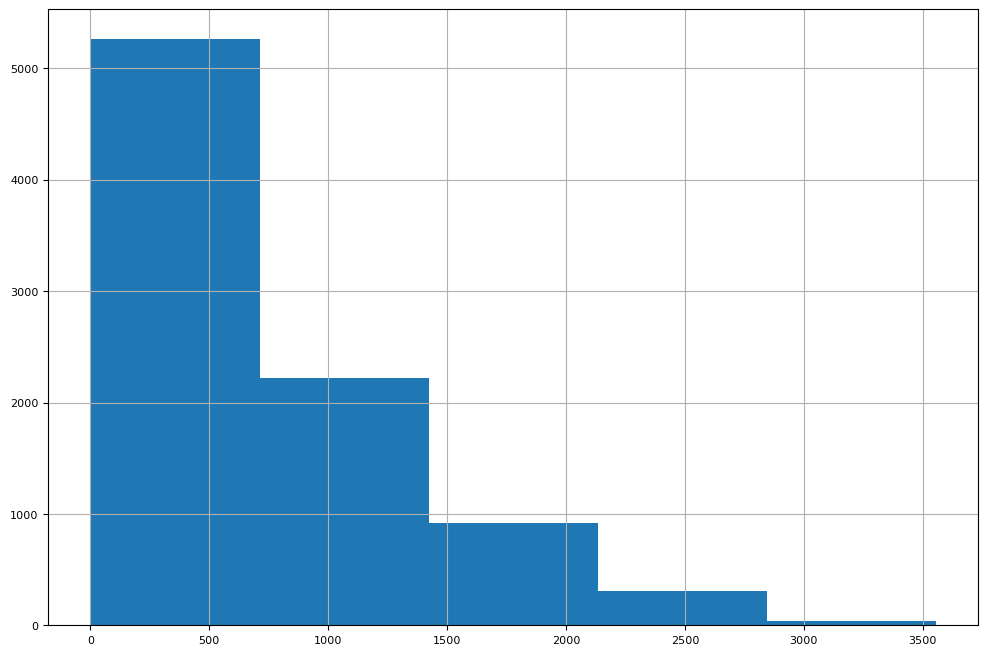

In [ ]:
cleaned_df['Rented Bike Count'].hist(bins=5, figsize=(12, 8))

In [ ]:
# add a new column to the dataframe that contains the range of values of rented bike count
cleaned_df['Rented Bike Count Range'] = pd.cut(cleaned_df['Rented Bike Count'], bins=[-1, 700, 1400, 2000, 2700, np.inf], labels=[1, 2, 3, 4, 5])

In [ ]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    cleaned_df, test_size=0.2, stratify=cleaned_df["Rented Bike Count Range"], random_state=42)


In [ ]:
def Riders_proportions(data):
    return data["Rented Bike Count Range"].value_counts() / len(data)

train_set, test_set = train_test_split(cleaned_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": Riders_proportions(cleaned_df),
    "Stratified %": Riders_proportions(strat_test_set),
    "Random %": Riders_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

train_set = train_set.drop(['Rented Bike Count Range'], axis=1)
test_set = test_set.drop(['Rented Bike Count Range'], axis=1)

##### Removing Outliers

Eliminate the outliers that were detected using the isolation forest.

In [ ]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=.05, random_state=0)
pred = iforest.fit_predict(strat_train_set)
# Extracting anomalies
from numpy import where
anomaly_index = where(pred==-1) #-1 is the label for anomalies
anomaly_values = strat_train_set.iloc[anomaly_index]
# Removing anomalies
ftrain_set = strat_train_set.drop(anomaly_values.index)
print("Number of outliers found:", len(anomaly_values))
ftrain_set = ftrain_set.drop(['Rented Bike Count Range'], axis=1)

Number of outliers found: 351


##### Feature Scaling

In [ ]:

ftrain_set.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Heat_Index_C,Autumn,Spring,Summer,Winter
3712,1501,16,18.6,30,5.1,1891,2.49,0.0,0.0,0,1,24.75,0.0,1.0,0.0,0.0
8157,1289,21,12.2,79,1.8,351,0.00,0.0,0.0,0,1,28.37,1.0,0.0,0.0,0.0
5979,278,3,27.6,69,0.9,2000,0.00,0.0,0.0,0,1,29.80,0.0,0.0,1.0,0.0
7640,2070,8,12.0,77,0.4,891,0.12,0.0,0.0,0,1,29.53,1.0,0.0,0.0,0.0
8227,19,19,12.8,97,0.9,245,0.00,0.0,0.0,0,1,17.70,1.0,0.0,0.0,0.0


In [ ]:
columns= ftrain_set.columns
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_train_set = pd.DataFrame(minmax_scaler.fit_transform(ftrain_set), columns=columns)

# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_train_set = pd.DataFrame(scaler.fit_transform(ftrain_set), columns=columns)


In [ ]:
from sklearn.linear_model import LinearRegression

# check mse with unscaled data
lin_reg = LinearRegression()
X_train = ftrain_set.drop(['Rented Bike Count'], axis=1)
y_train = ftrain_set['Rented Bike Count']
X_test = test_set.drop(['Rented Bike Count'], axis=1)
y_test = test_set['Rented Bike Count']
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_unscaled = mean_squared_error(y_test, y_pred)

# check mse with minmax scaled data
lin_reg = LinearRegression()

X_train = minmax_train_set.drop(['Rented Bike Count'], axis=1)
y_train = ftrain_set['Rented Bike Count']
minmax_test = pd.DataFrame(minmax_scaler.transform(test_set), columns=test_set.columns)
X_test = minmax_test.drop(['Rented Bike Count'], axis=1)
y_test = test_set['Rented Bike Count']
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse_minmax = mean_squared_error(y_test, y_pred)

# check mse with standard scaled data
lin_reg = LinearRegression()
X_train = std_train_set.drop(['Rented Bike Count'], axis=1)
y_train = ftrain_set['Rented Bike Count']
std_test = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)
X_test = std_test.drop(['Rented Bike Count'], axis=1)
y_test = test_set['Rented Bike Count']
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse_std = mean_squared_error(y_test, y_pred)

print("MSE with unscaled data: " + str(mse_unscaled))
print("MSE with minmax scaled data: " + str(mse_minmax))
print("MSE with standard scaled data: " + str(mse_std))

MSE with unscaled data: 229823.38106851376
MSE with minmax scaled data: 229823.38106851358
MSE with standard scaled data: 229823.3810685136


With a linear regression model, the data scaling does not have any notable predictive power as nearly identical MSEs were produced from the scaled and unscaled datasets; However, the unscaled dataset, the minmax scaled dataset, and the standard scaled dataset will all be further experimented with different ML models.

##### Feature Selection using LASSO

I will now produce another dataset that will employ feature selection using LASSO, thus eliminating some data noise that may be affecting model performance.

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.01)
X = ftrain_set.drop(['Rented Bike Count'], axis=1)
Y = ftrain_set['Rented Bike Count']
ls_model = ls.fit(X,Y)
cols = []
lasso_res = pd.DataFrame(ls_model.coef_,X.columns,columns=['Coefficient'])
lasso_res

,Coefficient
Hour,28.103295
Temperature(C),28.251951
Humidity(%),-7.522312
Wind speed (m/s),15.007376
Visibility (10m),-0.005698
Solar Radiation (MJ/m2),-85.057993
Rainfall(mm),-192.438944
Snowfall (cm),14.221951
Holiday,-180.718082
Functioning Day,964.359220


According to LASSO, the Visibility has a coeifficient of 0, which means that LASSO suggests that this column has no predictive power. Thus, I will remove this column and try running a linear regression model to check if the MSE result improved.

In [ ]:
X = ftrain_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y = ftrain_set['Rented Bike Count']
# check mse with unscaled data
lin_reg = LinearRegression()
X_test = test_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
y_test = test_set['Rented Bike Count']
lin_reg.fit(X, Y)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_unscaled = mean_squared_error(y_test, y_pred)
print("MSE of LASSO with unscaled data: " + str(mse_unscaled))


MSE of LASSO with unscaled data: 229803.51491099125


Linear regression using the LASSO reduced dataset has a lower MSE than that trained on the unscaled dataset, thus I will be using the LASSO reduced dataset for the next steps

### Select and Train a Model

I will be testing and evaluating the following models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor

##### Training and Evaluating on Training Set

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_train = ftrain_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']

#train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, y_pred)

# train decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(Y_train, y_pred)

# train random forest regressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, Y_train)
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(Y_train, y_pred)

# train gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)
y_pred = gb_reg.predict(X_train)
gb_mse = mean_squared_error(Y_train, y_pred)

print("Linear Regression MSE: " + str(lin_mse))
print("Decision Tree MSE: " + str(tree_mse))
print("Random Forest MSE: " + str(forest_mse))
print("Gradient Boosting MSE: " + str(gb_mse))

Linear Regression MSE: 163562.0451253192
Decision Tree MSE: 0.15209553853086977
Random Forest MSE: 7037.259010952756
Gradient Boosting MSE: 56355.244587368645


In [ ]:
#Testing results using data scaled using minmax scaler

X_train = minmax_train_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']

#train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, y_pred)

# train decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(Y_train, y_pred)

# train random forest regressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, Y_train)
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(Y_train, y_pred)

# train gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)
y_pred = gb_reg.predict(X_train)
gb_mse = mean_squared_error(Y_train, y_pred)

print("Linear Regression MSE using MinMax scaled dataset: " + str(lin_mse))
print("Decision Tree MSE using MinMax scaled dataset: " + str(tree_mse))
print("Random Forest MSE using MinMax scaled dataset: " + str(forest_mse))
print("Gradient Boosting MSE using MinMax scaled dataset: " + str(gb_mse))

Linear Regression MSE using MinMax scaled dataset: 163562.0451253192
Decision Tree MSE using MinMax scaled dataset: 0.15209553853086977
Random Forest MSE using MinMax scaled dataset: 7014.937889126108
Gradient Boosting MSE using MinMax scaled dataset: 56355.244587368645


In [ ]:
#Testing results using data scaled using standard scaler

X_train = std_train_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']

#train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, y_pred)

# train decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(Y_train, y_pred)

# train random forest regressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, Y_train)
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(Y_train, y_pred)

# train gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)
y_pred = gb_reg.predict(X_train)
gb_mse = mean_squared_error(Y_train, y_pred)

print("Linear Regression MSE using Standard scaled dataset: " + str(lin_mse))
print("Decision Tree MSE using Standard scaled dataset: " + str(tree_mse))
print("Random Forest MSE using Standard scaled dataset: " + str(forest_mse))
print("Gradient Boosting MSE using Standard scaled dataset: " + str(gb_mse))

Linear Regression MSE using Standard scaled dataset: 163562.0451253192
Decision Tree MSE using Standard scaled dataset: 0.15209553853086977
Random Forest MSE using Standard scaled dataset: 7022.998180380614
Gradient Boosting MSE using Standard scaled dataset: 56355.244587368645


In the above snippets of code, I tested my suggested models on the unscaled data, the minmax scaled data, and the standard scaled data. According to the above model runs, I am able to conclude the following results which are consistent across all 3 datasets:
* The best perfromer was the Decision Tree regression, however the MSE is too low, suggesting a chance of overfitting the data
* The second best performer was the Random Forest Regressor, with an MSE that is substantially lower than that of the Linear Regression and the Gradient Boosting.
* The Linear Regression was the worst perfromer of all models

** If I were to exclude the Decision Tree due to overfitting, then the model that performed the best is the Random Forest when trained with the MinMax scaled dataset, thus I will be using the MinMax scaled dataset for the next steps.

##### Better Evaluation Using Cross-Validation

Since I beleive that the decision tree is overfitting the data, I will be assesing the generalized model performance more accurately by employing 3 fold cross validation.

In [ ]:
#5 fold cross validation
from sklearn.model_selection import cross_val_score

X_train = minmax_train_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']
# Linear Regression
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, Y_train,
                             scoring="neg_mean_squared_error", cv=3)

# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_reg, X_train, Y_train,
                              scoring="neg_mean_squared_error", cv=3)

# Random Forest
forest_reg = RandomForestRegressor(random_state=42)
forest_scores = cross_val_score(forest_reg, X_train, Y_train,
                                scoring="neg_mean_squared_error", cv=3)

# Gradient Boosting
gb_reg = GradientBoostingRegressor(random_state=42)
gb_scores = cross_val_score(gb_reg, X_train, Y_train,
                            scoring="neg_mean_squared_error", cv=3)

print("Linear Regression MSE: " + str(-lin_scores.mean()))
print("Decision Tree MSE: " + str(-tree_scores.mean()))
print("Random Forest MSE: " + str(-forest_scores.mean()))
print("Gradient Boosting MSE: " + str(-gb_scores.mean()))

Linear Regression MSE: 164357.8905429881
Decision Tree MSE: 94367.63500826196
Random Forest MSE: 52493.0962419793
Gradient Boosting MSE: 60886.63043951924


As previously proposed, the Decision Tree was overfitting the training set. The cross validation scores show that the decision tree is the third worst performer, which suggests that the decision tree is overfitting as it performed poorly when it was tested against an unseen validation set. According to the cross validation results, the Random Forest Regressor was the best performing model, and therefore it will be the chosen model for this regression task.

### Fine-Tuning the Model


##### Grid Search CV

I will use Grid Search CV to perform hyperparameter tuning to the Random Forest Regressor on the LASSO reduced and MinMax scaled dataset; The mean validation set MSEs produced by Grid Search CV will be evaluated.

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train = minmax_train_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']

rf_regressor = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

In [ ]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
#displaying a table with the average MSE for each combination of hyperparameters
results_df = pd.DataFrame(grid_search.cv_results_)

columns_of_interest = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']
results_df = results_df[columns_of_interest]
results_df['mean_test_score'] = results_df['mean_test_score']**2
#rename mean_test_score column to mse
results_df = results_df.rename(columns={'mean_test_score': 'Average MSE'})
results_df = results_df.sort_values(by=['Average MSE'], ascending=True)

display(results_df)

,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,Average MSE
78,100,20,5,1,52180.854038
6,100,None,5,1,52266.195456
114,100,30,5,1,52272.869189
79,200,20,5,1,52278.465760
7,200,None,5,1,52286.158844
...,...,...,...,...,...
40,10,10,5,1,58545.872385
36,10,10,2,1,59023.980077
68,10,10,10,4,59506.203129
64,10,10,5,4,59521.742785


After hyperparameter tuning the Random Forest Regressor, it was able to achieve an average validation set MSE of 52,181 which is lower than the average validation set MSE of the untuned model which was 52,493. Thus, the following will be the set of parameters that will be used to tune the Random Forest Regressor Model:
* 'max_depth': 20,
* 'min_samples_leaf': 1,
* 'min_samples_split': 5,
* 'n_estimators': 100

##### Randomized Search CV:

I will use Randomized Search CV to perform hyperparameter tuning to the Random Forest Regressor on the LASSO reduced and MinMax scaled dataset; The mean validation set MSEs produced by the Randomized Search CV will be evaluated.

In [ ]:

X_train = minmax_train_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']

from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor
rf = RandomForestRegressor()

# Perform randomized search
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [ ]:
cv_results = random_search.cv_results_

# Create a DataFrame to display the MSEs for each predictor tried
results_df = pd.DataFrame({
    'Parameters': cv_results['params'],
    'Average MSE': -cv_results['mean_test_score']
})
results_df = results_df.sort_values(by=['Average MSE'], ascending=True)


display(results_df)

,Parameters,Average MSE
1,"{'n_estimators': 200, 'min_samples_split': 5, ...",52368.292013
2,"{'n_estimators': 100, 'min_samples_split': 10,...",52706.606651
9,"{'n_estimators': 100, 'min_samples_split': 5, ...",52779.004548
0,"{'n_estimators': 50, 'min_samples_split': 10, ...",53422.116207
3,"{'n_estimators': 50, 'min_samples_split': 2, '...",54525.924948
5,"{'n_estimators': 10, 'min_samples_split': 2, '...",56459.226417
6,"{'n_estimators': 10, 'min_samples_split': 2, '...",56840.736868
7,"{'n_estimators': 50, 'min_samples_split': 5, '...",57312.251272
8,"{'n_estimators': 100, 'min_samples_split': 5, ...",57316.840844
4,"{'n_estimators': 10, 'min_samples_split': 10, ...",59070.686455


The average validation set MSE of the parameters suggested by Random Search CV is higher than that of the parameters suggested by Grid Search CV, therefore I will be using the Grid Search CV parameter suggestions.

### Evaluating Final Model Performance on Test Set

For the final step, I will be evaluating and analyzing my tuned model performance on the test set

In [ ]:
X_train = minmax_train_set.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
Y_train = ftrain_set['Rented Bike Count']

minmax_test = pd.DataFrame(minmax_scaler.transform(test_set), columns=test_set.columns)
X_test = minmax_test.drop(['Rented Bike Count','Visibility (10m)'], axis=1)
y_test = test_set['Rented Bike Count']

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1)
rf_regressor.fit(X_train, Y_train)
y_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print("The final tuned Random Forest Regressor model achieved a " + str(rf_mse) + " test set MSE")

The final tuned Random Forest Regressor model achieved a 26738.55214523678 test set MSE


Finding the 95% confidence interval for the test MSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

(21829.61517620138, 31647.48911427218)

Random Forest Feature Importance

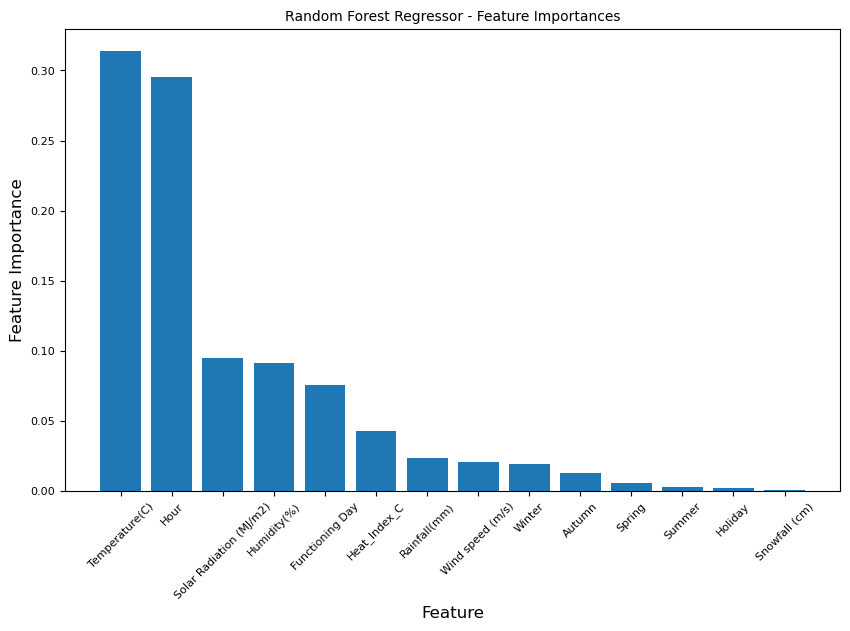

In [ ]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

feature_names = list(X_train.columns)

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Regressor - Feature Importances")
plt.show()

The tuned random forest regressor achieved a test set Mean Squared Error (MSE) score of 26,738.6, with a 95% confidence interval for the test set ranging from [21,829.6, 31,647.5]. According to the random forest regressor, the top 5 features with the highest predictive power are Temperature, Hour of the day, Solar Radiation, Humidity, and whether or not the day is a functioning/workday. Notably, the Heat Index variable, which I created during the experimentation with attribute combinations phase, emerged as the 6th most important variable, contributing positively to the model's predictive power.

### A1 - An end to end ML project concluding note:

This project underwent multiple phases where data and model performances were assessed:

1. **Data Structure:** Thorough observations were made regarding the dataset statistics and distributions.

2. **Data Visualization for Insights:** Correlations between data were studied, and experiments were conducted to generate different attribute combinations.

3. **Preparing Data:** Data was prepared for use by machine learning models through the following steps:
   - **Missing Data:** No missing data was found.
   - **Categorical Data:** Categorical data were one-hot encoded to ensure usability by ML models.
   - **Multicollinearity:** VIF testing was conducted to study data correlations, and specific columns with high correlations were removed to ensure ML models do not suffer from multicollinearity.
   - **Outlier Detection:** Outliers were detected using isolation forests and subsequently eliminated.
   - **Feature Scaling:** Features were scaled using the Standard Scaler and MinMax Scaler.
   - **Feature Selection:** LASSO was utilized for feature selection, and features with no predictive power were removed to reduce data noise during predictions.

4. **Selecting and Training Model:** Linear Regression, Random Forest Regressor, Decision Tree Regressor, and Gradient Boosting Regressor were all trained and evaluated using cross-validation.

5. **Tuning Model:** The best-performing model, the Random Forest Regressor, was tuned using Grid Search CV and Randomized Search CV.

6. **Model Test Set Performance Evaluation:** The tuned Random Forest Regression performance on the test set was evaluated.


### Causal Inference

In [ ]:
!pip install causalml

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor, plot_importance
from xgboost import XGBRegressor
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseRRegressor, BaseXRegressor
from sklearn.ensemble import RandomForestRegressor
from causalml.metrics import *

In [ ]:
cleaned_df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Heat_Index_C,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,71.57,0.0,0.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,74.29,0.0,0.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,77.80,0.0,0.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,80.23,0.0,0.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,72.62,0.0,0.0,0.0,1.0


##### Feature Importances

In [ ]:
#my data was already checked in part 1 for missing values and data skewness, categorical variables were converted, and interactions & correlations
#between the data were studied

X_train = cleaned_df.drop(['Rented Bike Count'], axis=1)
y_train = cleaned_df['Rented Bike Count']

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 15
[LightGBM] [Info] Start training from score 704.602055


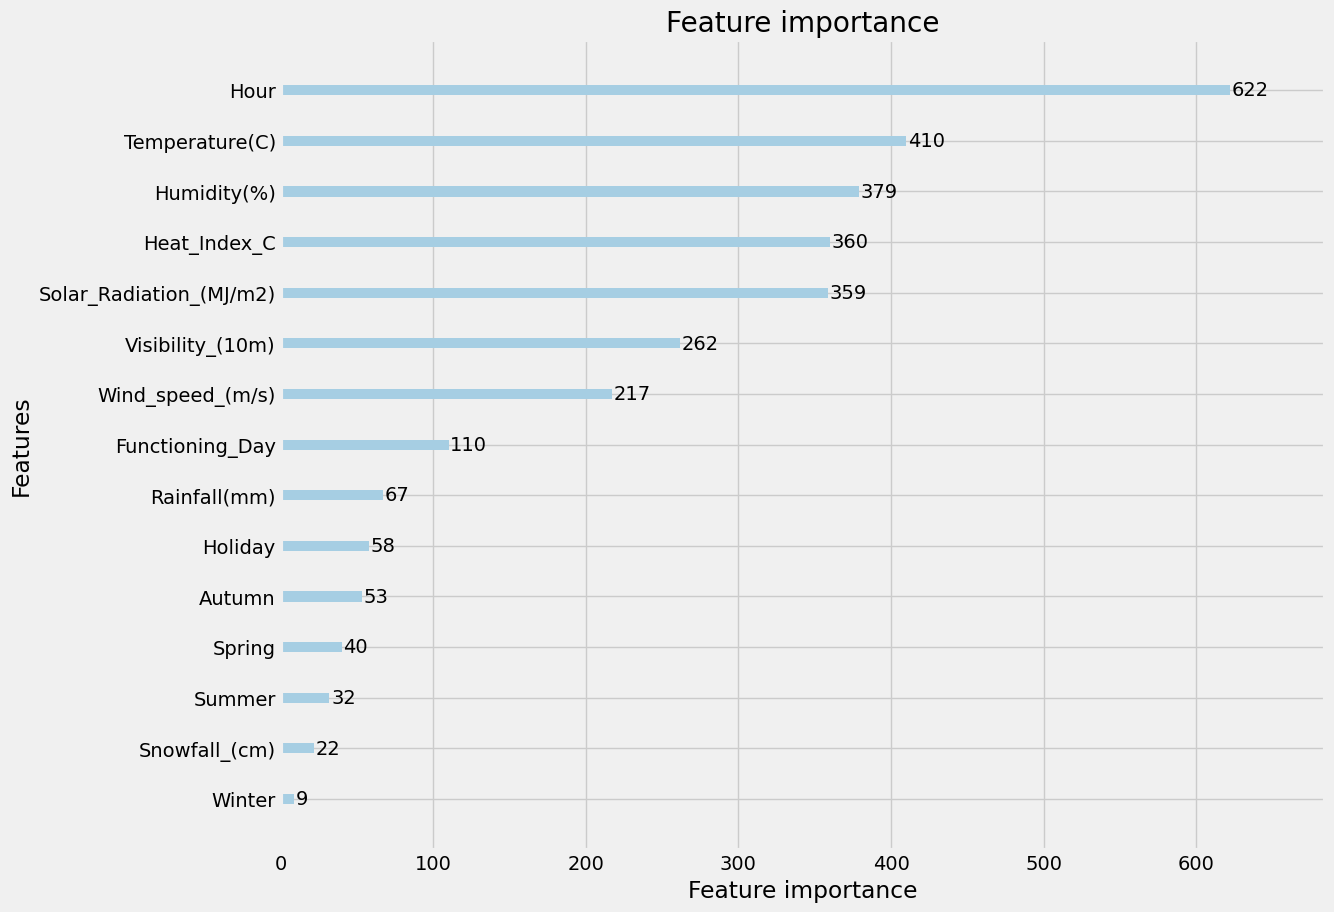

In [ ]:
lgbm_reg = LGBMRegressor(random_state=42)
model_lgbm= lgbm_reg.fit(X_train, y_train)
lgb.plot_importance(model_lgbm)
plt.rcParams['figure.figsize'] = [12, 10]
plt.show()

According to the above feature importances, we can observe that the greatest factor affecting the hourly demand for bikes is the hour of the day. This is understandable, as certain hours, such as 9 am and 5 pm (beginning and end of the workday), are rush hours, while at other times, everyone is at home late at night. Afterward, it becomes evident that temperature, heat index, humidity, and solar radiation are all factors that strongly affect bike demand. These factors seem to contribute to how hot the weather is. This leads us to question whether the relationship between hot weather and bike demand is causation or just correlation.

##### Extra data preperation:

Now, I will remove outliers from the training set using an isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=.05, random_state=0)
pred = iforest.fit_predict(X_train)
# Extracting anomalies
from numpy import where
anomaly_index = where(pred==-1) #-1 is the label for anomalies
anomaly_values = X_train.iloc[anomaly_index]
# Removing anomalies
X_train = X_train.drop(anomaly_values.index)
print("Number of outliers found:", len(anomaly_values))
y_train = y_train.drop(anomaly_values.index)

X does not have valid feature names, but IsolationForest was fitted with feature names


Number of outliers found: 438


I want to now assess if a feature with high importance also has a causal effect with the demand of bike riders or not; thus, I will be using the temperature column as the treatment variable.

In [ ]:
treatment = X_train['Temperature(C)']
X_train = X_train.drop(['Temperature(C)'],axis=1)

I will drop the heat index column as it's a calculation that involves temperature and humidity, so keeping it would cause and information leakage.

In [ ]:
X_train = X_train.drop(['Heat_Index_C'],axis=1)


Now, I will set the treatment variable, temperature, as a binary variable, where 0 denotes colder weather (temperature less than 10 degrees Celsius), and 1 denotes hotter weather (temperature greater than 10 degrees Celsius). Consequently, my treatment group will be the one experiencing hotter temperatures.

In [ ]:
old_treatment = treatment.copy()
treatment = np.where(treatment > 10, 1, 0)

##### XGB Regressor

###### Models

I will run and compare the performances of the S learner, T learner, and X learner with the XGB regressor.

In [ ]:
s_learner = BaseSRegressor(XGBRegressor(random_state=42))
print('ATE with S-Learner using XGBRegressor')
ate, lb, ub = s_learner.estimate_ate(X=X_train, treatment=treatment, y=y_train, return_ci=True)
S_ATE_XGB = (ate[0])
print('Temperature (c): {:.2f} ({:.2f}, {:.2f})'.format(ate[0],lb[0], ub[0]))

slearner_tau_XGB = s_learner.fit_predict(X_train, treatment, y_train)

ATE with S-Learner using XGBRegressor
Temperature (c): 467.10 (456.14, 478.05)


In [ ]:
t_learner = BaseTRegressor(XGBRegressor(random_state=42))
print('ATE with T-Learner using XGBRegressor')
ate, lb, ub = t_learner.estimate_ate(X=X_train, treatment=treatment, y=y_train)
T_ATE_XGB = (ate[0])
print('Temperature (c): {:.2f} ({:.2f}, {:.2f})'.format(ate[0],lb[0], ub[0]))

Tlearner_tau_XGB = t_learner.fit_predict(X_train, treatment, y_train)

ATE with T-Learner using XGBRegressor
Temperature (c): 426.41 (414.79, 438.02)


In [ ]:
x_learner = BaseXRegressor(XGBRegressor(random_state=42))
print('ATE with x-Learner using XGBRegressor')
ate, lb, ub = x_learner.estimate_ate(X=X_train, treatment=treatment, y=y_train)
X_ATE_XGB = (ate[0])
Xlearner_tau_XGB = x_learner.fit_predict(X_train, treatment, y_train)

In [ ]:
print('Temperature (c): {:.2f} ({:.2f}, {:.2f})'.format(ate[0],lb[0], ub[0]))

Temperature (c): 308.72 (299.86, 317.58)


Now I want to compare the model performances:

In [ ]:
data = [slearner_tau_XGB.ravel(), Tlearner_tau_XGB.ravel(),Xlearner_tau_XGB.ravel(), treatment.ravel(), y_train.ravel()]
df_ravels = pd.DataFrame(data, index=['S','T','X','w','y']).T
ate_data = [S_ATE_XGB, T_ATE_XGB, X_ATE_XGB]
ate_scores_df = pd.DataFrame(ate_data, index = ['S','T','X'], columns = ["ATE Score"])
ate_scores_df["AUUC"] = auuc_score(df_ravels)
ate_scores_df

,ATE Score,AUUC
S,467.096029,0.697366
T,426.408210,0.685268
X,308.715390,0.655821


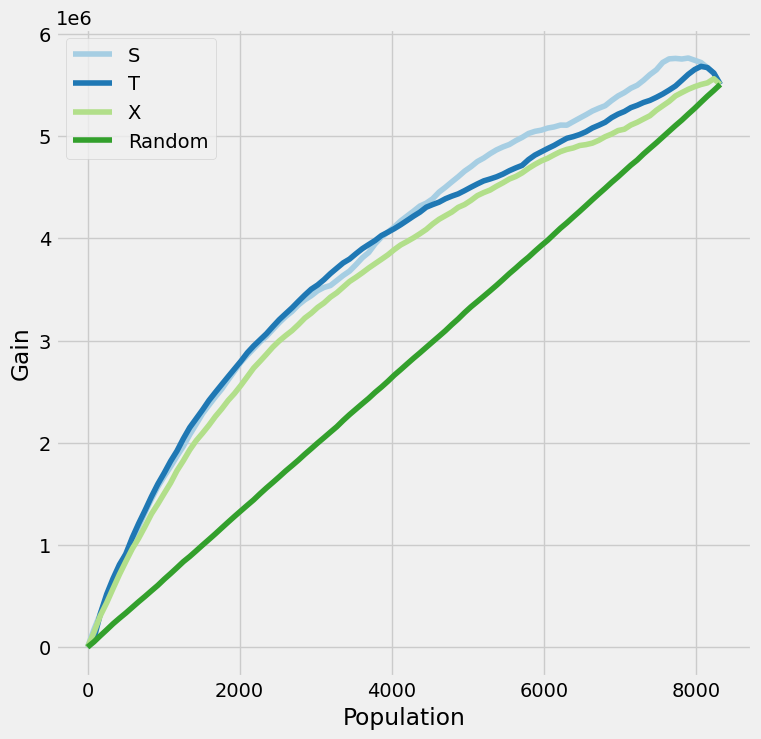

In [ ]:
plot_gain(df_ravels)

Based on the figure and AUUC table above, it is evident that the S-learner achieves the highest AUUC score. This implies that the S-learner is the most effective meta-learner for predicting the causal relationship between the treatment (hot weather) and the hourly demand for bikes. Consequently, I will utilize the S-regressor scores for the subsequent analysis. It is noteworthy that all meta-learners—S, T, and X—have an AUUC greater than 0.5, indicating superior performance compared to a random model, which would have a 0.5 AUUC. According to the S-regressor, the Average Treatment Effect (ATE) of the hot temperature treatment is 467 when compared to cold weather. This suggests that, on average, hot weather leads to an increase of 467 in the hourly demand for bikes. The substantial impact of hot weather on people's inclination to ride bikes is reflected in this significant rise in hourly demand.

###### Feature Importance of S Regressor

Text(0.5, 1.0, 'S-Learner with XGB - Hot Weather Treatment')

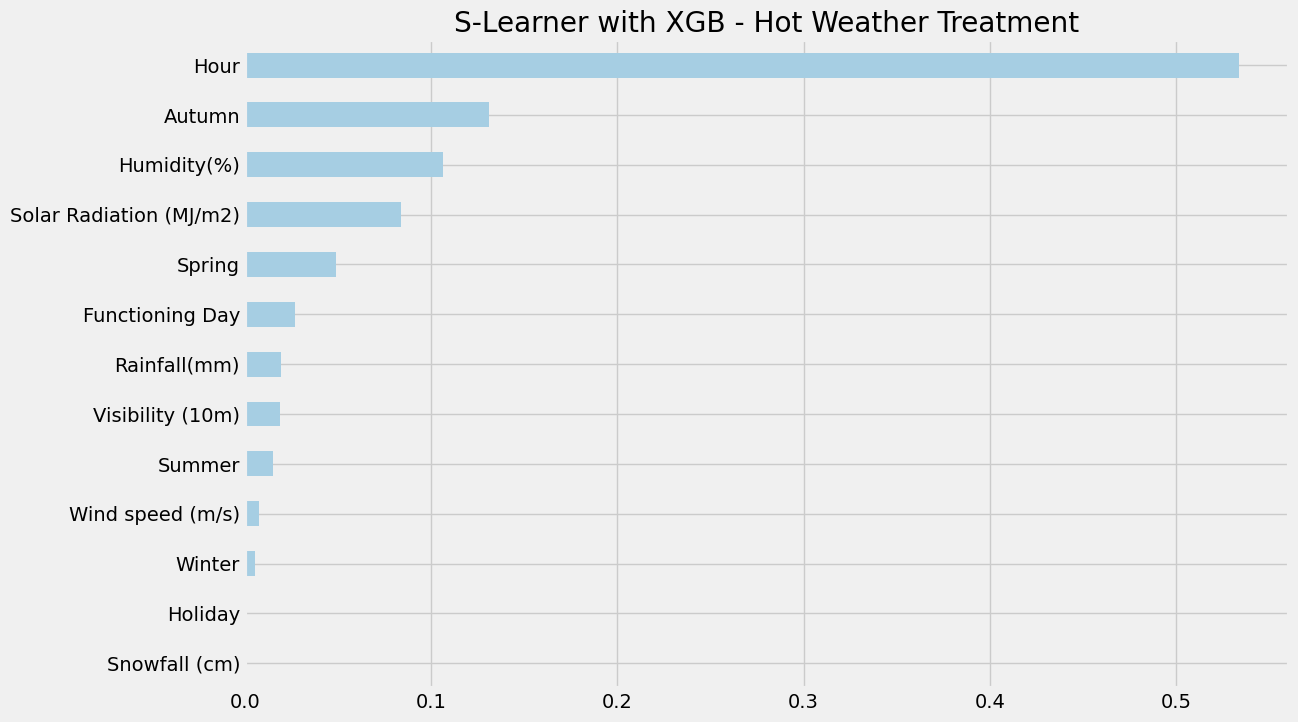

In [ ]:
model_tau_feature = RandomForestRegressor()
s_learner.plot_importance(X=X_train, tau=slearner_tau_XGB, normalize=True,model_tau_feature=model_tau_feature, method='auto',features=X_train.columns)
plt.title("S-Learner with XGB - Hot Weather Treatment")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

model = XGBRegressor(importance_type='gain')
X_train1, X_test, y_train1, y_test = train_test_split(X_train, slearner_tau_XGB , test_size=0.3, random_state=42)
tau_fitting = model.fit(X_train1, y_train1)

perm_imp = permutation_importance(estimator=tau_fitting, X=X_test, y=y_test,random_state=42).importances_mean
pd.Series(perm_imp, X_train.columns).sort_values(ascending=False)

Hour                       1.511994
Solar Radiation (MJ/m2)    0.342995
Autumn                     0.274009
Humidity(%)                0.130290
Spring                     0.051809
Summer                     0.049878
Functioning Day            0.047020
Rainfall(mm)               0.046805
Visibility (10m)           0.032862
Wind speed (m/s)           0.010570
Winter                     0.004948
Holiday                    0.003065
Snowfall (cm)              0.000932
dtype: float64

According to the feature importances and permutation feature importances (which provide a more robust assessment of feature importance), the top 5 features contributing to hourly bike demands in hot weather are Hour, Solar Radiation, Autumn (indicating the season generally), Humidity, and Spring.

The Hour feature remains the top contributor, as mentioned earlier, playing a crucial role in capturing the peaks and troughs associated with rush hours and late-night periods when individuals are more likely to be at home. Solar Radiation emerges as another key factor, suggesting that the intensity of sunlight influences bike demand. This aligns with the idea that favorable weather conditions, marked by increased solar radiation, positively impact people's willingness to engage in outdoor activities like bike riding. The seasonal indicators, Autumn and Spring, also hold significance. The preference for biking during these seasons may be attributed to milder temperatures, contributing to an overall change in demand. Humidity is identified as a contributing factor, where high humidity might influence individuals' comfort levels, affecting their likelihood to choose biking as a mode of transportation.

In [ ]:
shap_slearner = s_learner.get_shap_values(X=X_train, tau=slearner_tau_XGB)

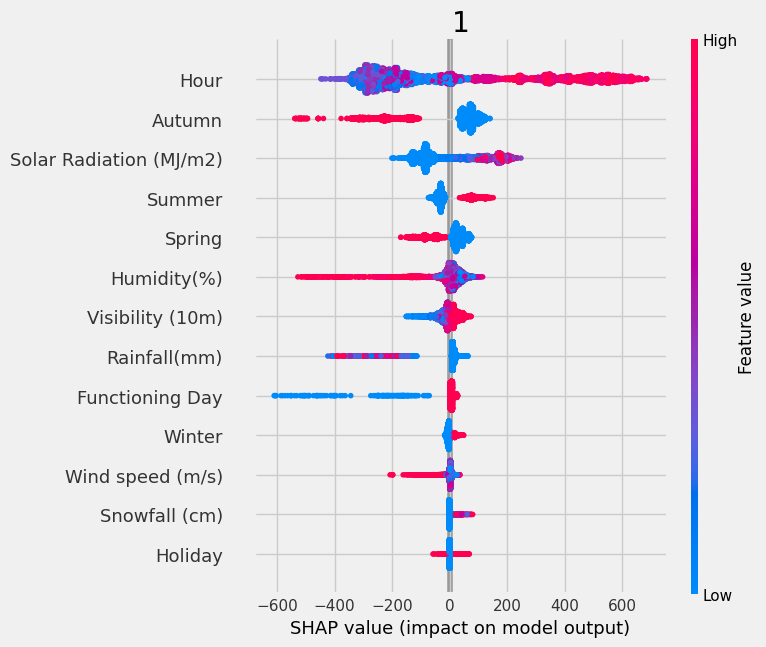

In [ ]:
s_learner.plot_shap_values(X=X_train, shap_dict=shap_slearner, features=X_train.columns)


According to the Shap Value plot above, several findings can be observed regarding the hourly demand for bikes during hot weather:

* Hour: The factor with the highest feature importance, 'Hour,' exhibits a negative Shap value during the early hours, roughly from 12 am until possibly 8 or 9 am. There is a significant concentration, especially around the 3 am to 7 am mark, indicating a negative Shap value. This implies that during this time frame, there is the most substantial decrease in bike demand due to the hour. Conversely, as the day progresses, the Shap value becomes more positive, signifying an increasing demand for bikes with later hours.

* Autumn: During autumn, there is a negative Shap value; however, when it is not autumn, the Shap value is positive. This indicates that the unfavorable and windy weather of autumn contributes negatively to the bike demand.

* Solar Radiation: Lower solar radiation levels, associated with colder weather, result in a negative Shap value, indicating a decrease in demand. Conversely, higher radiation levels, corresponding to hotter weather, yield a positive Shap value, suggesting an increase in demand due to the rise in solar radiation.

* Humidity: In very high humidity, the Shap value becomes extremely negative, signifying that high humidity is an unfavorable weather condition. Therefore, it strongly contributes to the decrease in hourly bike demand.

* Functioning day: On non-working days, the Shap value is negative. Notably, this specific condition has the lowest Shap value among all predictors, indicating that on non-working days, the demand for bikes is significantly negatively affected due to fewer people being on the streets.

* Rainfall: Regardless of whether there is heavy or light rainfall, any form of rainfall results in a negative Shap value, indicating a decrease in the demand for bikes. However, in lighter rainfall, there are instances of slightly positive Shap values, suggesting that in very light rain, people may still be willing to ride bikes.

##### LGBM Regressor

###### Models

I will run and compare the performances of the S learner, T learner, and X learner with the LGBM regressor.

In [ ]:
s_learner = BaseSRegressor(LGBMRegressor(random_state=42))
print('ATE with S-Learner using LGBMRegressor')
ate, lb, ub = s_learner.estimate_ate(X=X_train, treatment=treatment, y=y_train, return_ci=True)
S_ATE_LGBM = (ate[0])
slearner_tau_LGBM = s_learner.fit_predict(X_train, treatment, y_train)
print('Temperature (c): {:.2f} ({:.2f}, {:.2f})'.format(ate[0],lb[0], ub[0]))

ATE with S-Learner using LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 8322, number of used features: 14
[LightGBM] [Info] Start training from score 732.583514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 8322, number of used features: 14
[LightGBM] [Info] Start training from score 732.583514
Temperature (c): 478.33 (465.85, 490.82)


In [ ]:
t_learner = BaseTRegressor(LGBMRegressor(random_state=42))
print('ATE with T-Learner using LGBMRegressor')
ate, lb, ub = t_learner.estimate_ate(X=X_train, treatment=treatment, y=y_train)
T_ATE_LGBM = (ate[0])
Tlearner_tau_LGBM = t_learner.fit_predict(X_train, treatment, y_train)
print('Temperature (c): {:.2f} ({:.2f}, {:.2f})'.format(ate[0],lb[0], ub[0]))

ATE with T-Learner using LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 3425, number of used features: 11
[LightGBM] [Info] Start training from score 343.272117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 4897, number of used features: 11
[LightGBM] [Info] Start training from score 1004.870941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove 

In [ ]:
x_learner = BaseXRegressor(LGBMRegressor(random_state=42))
print('ATE with X-Learner using LGBMRegressor')
ate, lb, ub = x_learner.estimate_ate(X=X_train, treatment=treatment, y=y_train)
X_ATE_LGBM = (ate[0])
Xlearner_tau_LGBM = x_learner.fit_predict(X_train, treatment, y_train)

In [ ]:
print('Temperature (c): {:.2f} ({:.2f}, {:.2f})'.format(ate[0],lb[0], ub[0]))

Temperature (c): 367.92 (357.90, 377.93)


Now, I want to compare model performances:

In [ ]:
data = [slearner_tau_LGBM.ravel(), Tlearner_tau_LGBM.ravel(),Xlearner_tau_LGBM.ravel(), treatment.ravel(), y_train.ravel()]
df_ravels = pd.DataFrame(data, index=['S','T','X','w','y']).T
ate_data = [S_ATE_LGBM, T_ATE_LGBM, X_ATE_LGBM]
ate_scores_df = pd.DataFrame(ate_data, index = ['S','T','X'], columns = ["ATE Score"])
ate_scores_df["AUUC"] = auuc_score(df_ravels)
ate_scores_df

,ATE Score,AUUC
S,478.334906,0.722752
T,512.012713,0.739813
X,367.916934,0.703191


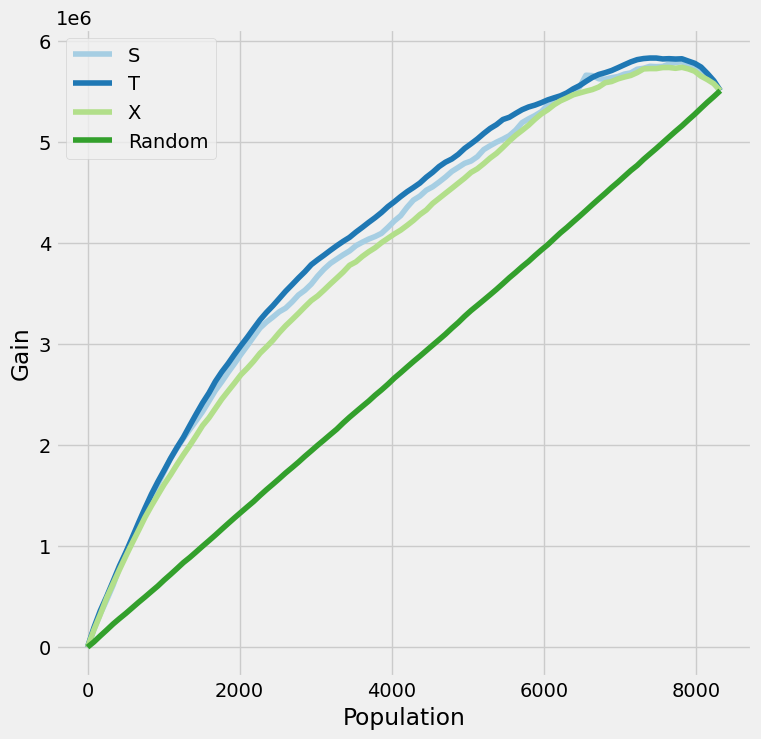

In [ ]:
plot_gain(df_ravels)

Based on the figure and AUUC table above, it is evident that the T-learner attains the highest AUUC score. This implies that the T-learner is the most effective meta-learner for predicting the causal relationship between the treatment (hot weather) and the hourly demand for bikes. Consequently, I will utilize the T-regressor scores for the subsequent analysis. It is noteworthy that all meta-learners—S, T, and X—have an AUUC greater than 0.5, indicating superior performance compared to a random model, which would have a 0.5 AUUC. Additionally, all learners with LGBM have an AUUC greater than that of XGB, suggesting better performance in predicting causal relations in our data. Thus, the T-regressor with LGBM is the best-performing model overall at predicting causal relationships in the data.

According to the T-regressor, the Average Treatment Effect (ATE) of the hot temperature treatment is 512 when compared to cold weather. This suggests that, on average, hot weather leads to an increase of 512 in the hourly demand for bikes. The substantial impact of hot weather on people's inclination to ride bikes is reflected in this significant rise in hourly demand.

###### Feature Importances of T-Regressor

Text(0.5, 1.0, 'T-Learner with LGBM - Hot Weather Treatment')

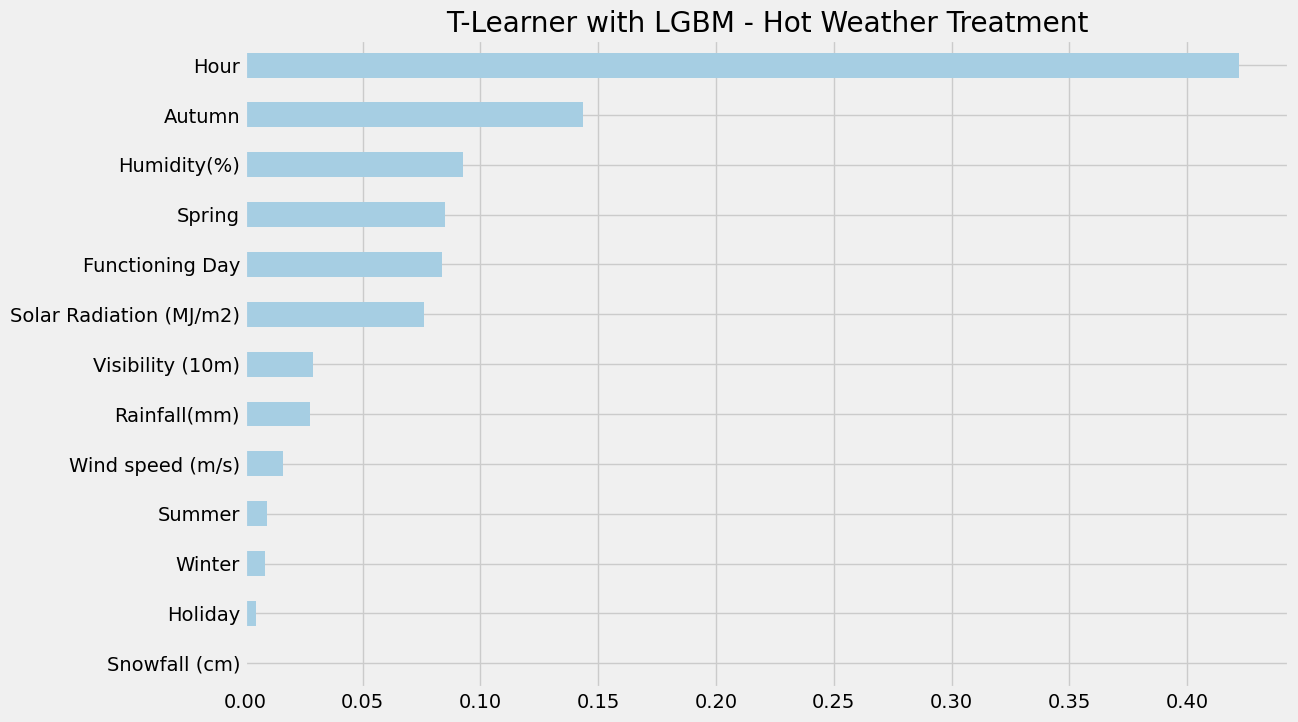

In [ ]:
model_tau_feature = RandomForestRegressor()
x_learner.plot_importance(X=X_train, tau=Tlearner_tau_LGBM, normalize=True,model_tau_feature=model_tau_feature, method='auto',features=X_train.columns)
plt.title("T-Learner with LGBM - Hot Weather Treatment")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

model = LGBMRegressor(importance_type='gain')
X_train1, X_test, y_train1, y_test = train_test_split(X_train, Tlearner_tau_LGBM , test_size=0.3, random_state=42)
tau_fitting = model.fit(X_train1, y_train1)

perm_imp = permutation_importance(estimator=tau_fitting, X=X_test, y=y_test,random_state=42).importances_mean
pd.Series(perm_imp, X_train.columns).sort_values(ascending=False)

Converting column-vector to 1d array


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 5825, number of used features: 13
[LightGBM] [Info] Start training from score 507.783306


Hour                       1.160265
Autumn                     0.301002
Solar Radiation (MJ/m2)    0.209569
Functioning Day            0.117718
Humidity(%)                0.115073
Spring                     0.104219
Visibility (10m)           0.050547
Rainfall(mm)               0.044992
Summer                     0.038866
Wind speed (m/s)           0.018431
Winter                     0.011187
Holiday                    0.007153
Snowfall (cm)              0.001602
dtype: float64

According to the feature importances and permutation feature importances (which provide a more robust assessment of feature importance), the top features contributing to hourly bike demands in hot weather are nearly identical to those suggested by the XGB model: Hour, Solar Radiation, Autumn (indicating the season generally), Humidity, and Spring. The reasons behind these features were explained earlier.

However, what differs is the inclusion of the 'functioning day' variable as a top contributor. The 'functioning day' variable denotes whether the day is a workday or not. Its significance in predicting bike demands during hot weather, when riding conditions are usually more available and favorable, suggests that people's commuting habits or daily routines on functioning days play a crucial role in influencing the demand for bikes.

In [ ]:
shap_tlearner = t_learner.get_shap_values(X=X_train, tau=Tlearner_tau_LGBM)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

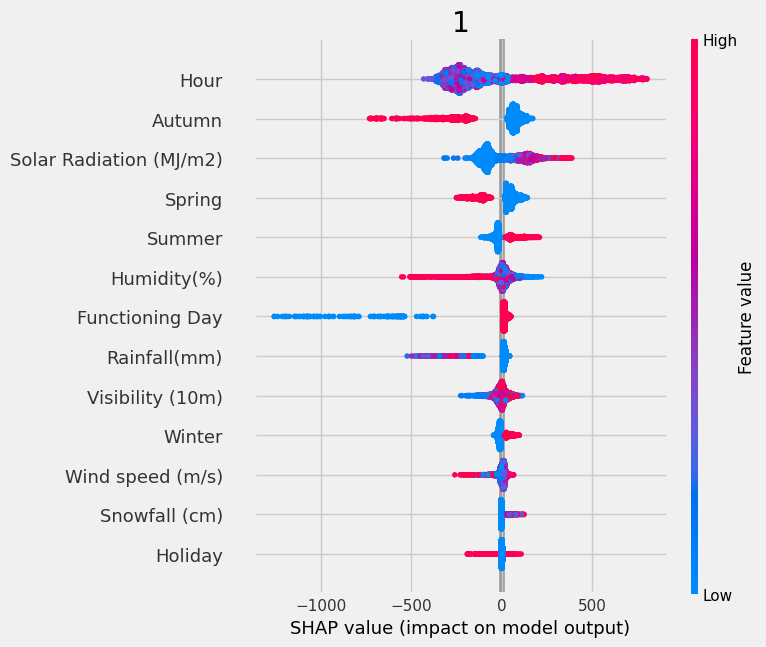

In [ ]:
t_learner.plot_shap_values(X=X_train, shap_dict=shap_tlearner, features=X_train.columns)


The Shap values plot above is very similar to the one produced by XGB in the previous section; thus, I have nothing additional to comment on. The same comments I made before about Shap values apply.